In [ ]:
    pip install tensorflow
    pip install scikit-learn
    pip install keras
    
Then run with:

    $ KERAS_BACKEND=tensorflow python3 iris-keras-nn.py

Example data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels:
[0 0 0 0 0]
Neural Network Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
24/24 - 1s - loss: 1.3093 - accuracy: 0.2583 - val_loss: 1.2523 - val_accuracy: 0.2667 - 1s/epoch - 46ms/step
Epoch 2/200
24/24 - 0s - loss: 1.1928 - accuracy: 0.2750 - val_loss: 1.1588 - val_accuracy: 0.2333 - 80ms/epoch - 3ms/step
Epoch 3/200
24/24 - 0s - loss: 1.1113 - accuracy: 0.1917 - val_loss: 1.0888 - val_accuracy: 0.1667 - 79ms/epoch - 3ms/step
Epoch 4/200
24/24 - 0s - loss: 1.0421 - accuracy: 0.3417 - val_loss: 1.0106 - val_accuracy: 0.5333 - 71ms/epoch - 3ms/step
Epoch 5/200
24/24 - 0s - loss: 0.9737 - accuracy: 0.4833 - val_loss: 0.9402 - val_accuracy: 0.5000 - 82ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 0.9096 - accuracy: 0.4833 - val_loss: 0.8807 - val_accuracy: 0.5333 - 93ms/epoch - 4ms/step
Epoch 7/200
24/24 - 0s - loss: 0.8615 - accuracy: 0.5000 - val_loss: 0.8188 - val_accuracy: 0.5000 - 71ms/epoch - 3ms/step
Epoch 8/200
24/24 - 0s - loss: 0.8053 - accuracy: 0.5500 - val_loss: 0.7737 - val_accuracy: 0.5333 - 84ms/epoch - 3ms/step
Epoch 9/200
24/24

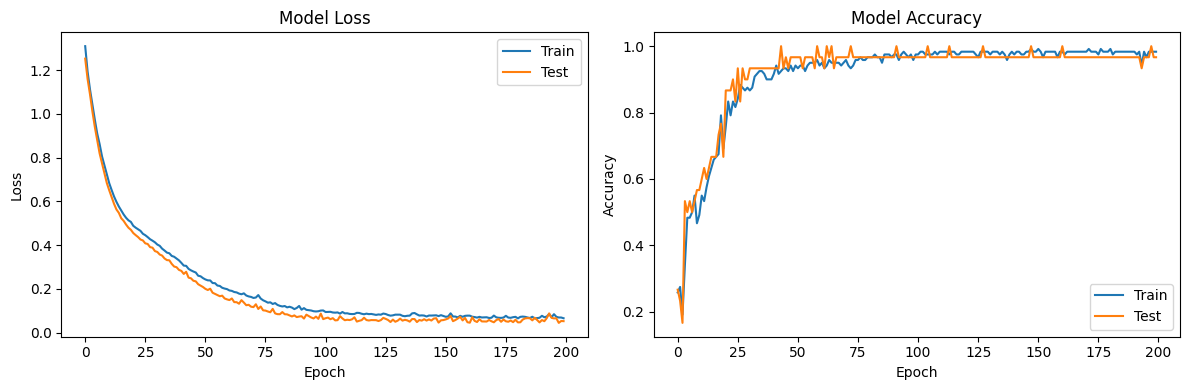

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

iris_data = load_iris()  # load the iris dataset

print('Example data:')
print(iris_data.data[:5])
print('Example labels:')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)  # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary:')
print(model.summary())

# Train the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), verbose=2, batch_size=5, epochs=200)

# Test on unseen data
results_train = model.evaluate(train_x, train_y)
results_test = model.evaluate(test_x, test_y)

print('Final train set loss: {:.4f}'.format(results_train[0]))
print('Final train set accuracy: {:.4f}'.format(results_train[1]))
print('Final test set loss: {:.4f}'.format(results_test[0]))
print('Final test set accuracy: {:.4f}'.format(results_test[1]))

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.tight_layout()
plt.show()
